In [328]:
# Libraries
import numpy as np
import pandas as pd


# Viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

# Stats
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm

# ML
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

In [330]:
data = pd.read_csv('/Users/biruk/Documents/Ironhack/king_-country_-houses/king_ country_ houses_aa.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [332]:
# Copy dataframe
df = data.copy()

In [334]:
# filtering properties value gretertahn $650K
df1 = df[df['price']>650000].sort_values('price')
df1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12390,224069105,20150410T000000,650100.0,2,1.00,1750,60872,1.0,0,0,...,7,1180,570,1973,0,98075,47.5946,-122.006,2480,5425
10907,381000240,20140806T000000,650500.0,4,1.75,2340,5940,1.0,0,0,...,8,1290,1050,1953,0,98115,47.6789,-122.281,1930,5940
17471,2205700470,20150122T000000,650500.0,5,4.25,3920,11412,2.0,0,0,...,7,3920,0,1955,2005,98006,47.5766,-122.151,1400,9750
4821,9839301060,20150406T000000,650500.0,3,1.75,1740,4400,1.5,0,0,...,8,1740,0,1903,0,98122,47.6115,-122.292,1740,4400
20223,7853380480,20140529T000000,650880.0,3,2.50,2930,6050,2.0,0,0,...,9,2930,0,2008,0,98065,47.5151,-121.883,2760,5765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


In [336]:
# Drop columns
df1.drop(columns=['id'],inplace=True)
df1.drop(columns=['date'],inplace=True)

In [338]:
df1.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1448,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
4411,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
9254,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3914,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [340]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5207 entries, 12390 to 7252
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          5207 non-null   float64
 1   bedrooms       5207 non-null   int64  
 2   bathrooms      5207 non-null   float64
 3   sqft_living    5207 non-null   int64  
 4   sqft_lot       5207 non-null   int64  
 5   floors         5207 non-null   float64
 6   waterfront     5207 non-null   int64  
 7   view           5207 non-null   int64  
 8   condition      5207 non-null   int64  
 9   grade          5207 non-null   int64  
 10  sqft_above     5207 non-null   int64  
 11  sqft_basement  5207 non-null   int64  
 12  yr_built       5207 non-null   int64  
 13  yr_renovated   5207 non-null   int64  
 14  zipcode        5207 non-null   int64  
 15  lat            5207 non-null   float64
 16  long           5207 non-null   float64
 17  sqft_living15  5207 non-null   int64  
 18  sqft_lot1

In [342]:
# grouped based on waterfront
locations = df1.groupby('waterfront')['waterfront'].agg('count').sort_values(ascending=False)
locations

waterfront
0    5074
1     133
Name: waterfront, dtype: int64

In [344]:
df1.price.describe().round(2)

count       5207.00
mean      998316.48
std       480315.94
min       650100.00
25%       730000.00
50%       835000.00
75%      1060800.00
max      7700000.00
Name: price, dtype: float64

In [346]:
df1.bedrooms.describe()

count    5207.000000
mean        3.828884
std         0.892464
min         0.000000
25%         3.000000
50%         4.000000
75%         4.000000
max        10.000000
Name: bedrooms, dtype: float64

In [348]:
df1.columns = df1.columns.str.lower().str.replace(' ', '_')
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12390,650100.0,2,1.00,1750,60872,1.0,0,0,4,7,1180,570,1973,0,98075,47.5946,-122.006,2480,5425
10907,650500.0,4,1.75,2340,5940,1.0,0,0,3,8,1290,1050,1953,0,98115,47.6789,-122.281,1930,5940
17471,650500.0,5,4.25,3920,11412,2.0,0,0,3,7,3920,0,1955,2005,98006,47.5766,-122.151,1400,9750
4821,650500.0,3,1.75,1740,4400,1.5,0,0,3,8,1740,0,1903,0,98122,47.6115,-122.292,1740,4400
20223,650880.0,3,2.50,2930,6050,2.0,0,0,3,9,2930,0,2008,0,98065,47.5151,-121.883,2760,5765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
4411,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
9254,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3914,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


In [350]:
df1.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [352]:
df1.duplicated().sum()

0

In [354]:
df1.eq(" ").sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [356]:
# number of unique values
df1.nunique()

price            1476
bedrooms           11
bathrooms          28
sqft_living       611
sqft_lot         3551
floors              6
waterfront          2
view                5
condition           5
grade               9
sqft_above        545
sqft_basement     253
yr_built          116
yr_renovated       52
zipcode            63
lat              2231
long              552
sqft_living15     449
sqft_lot15       3242
dtype: int64

In [358]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
price,5207.0,998316.477626,480315.943743,650100.0000,730000.0000,835000.0000,1.060800e+06,7.700000e+06
bedrooms,5207.0,3.828884,0.892464,0.0000,3.0000,4.0000,4.000000e+00,1.000000e+01
bathrooms,5207.0,2.686720,0.792877,0.0000,2.2500,2.5000,3.250000e+00,8.000000e+00
sqft_living,5207.0,3020.637603,1029.036062,890.0000,2350.0000,2910.0000,3.523000e+03,1.354000e+04
sqft_lot,5207.0,21393.729787,60677.325599,520.0000,5400.5000,8616.0000,1.455200e+04,1.651359e+06
floors,5207.0,1.717496,0.493608,1.0000,1.0000,2.0000,2.000000e+00,3.500000e+00
waterfront,5207.0,0.025543,0.157781,0.0000,0.0000,0.0000,0.000000e+00,1.000000e+00
view,5207.0,0.634915,1.204660,0.0000,0.0000,0.0000,0.000000e+00,4.000000e+00
condition,5207.0,3.462262,0.688573,1.0000,3.0000,3.0000,4.000000e+00,5.000000e+00
grade,5207.0,8.870175,1.225626,5.0000,8.0000,9.0000,1.000000e+01,1.300000e+01


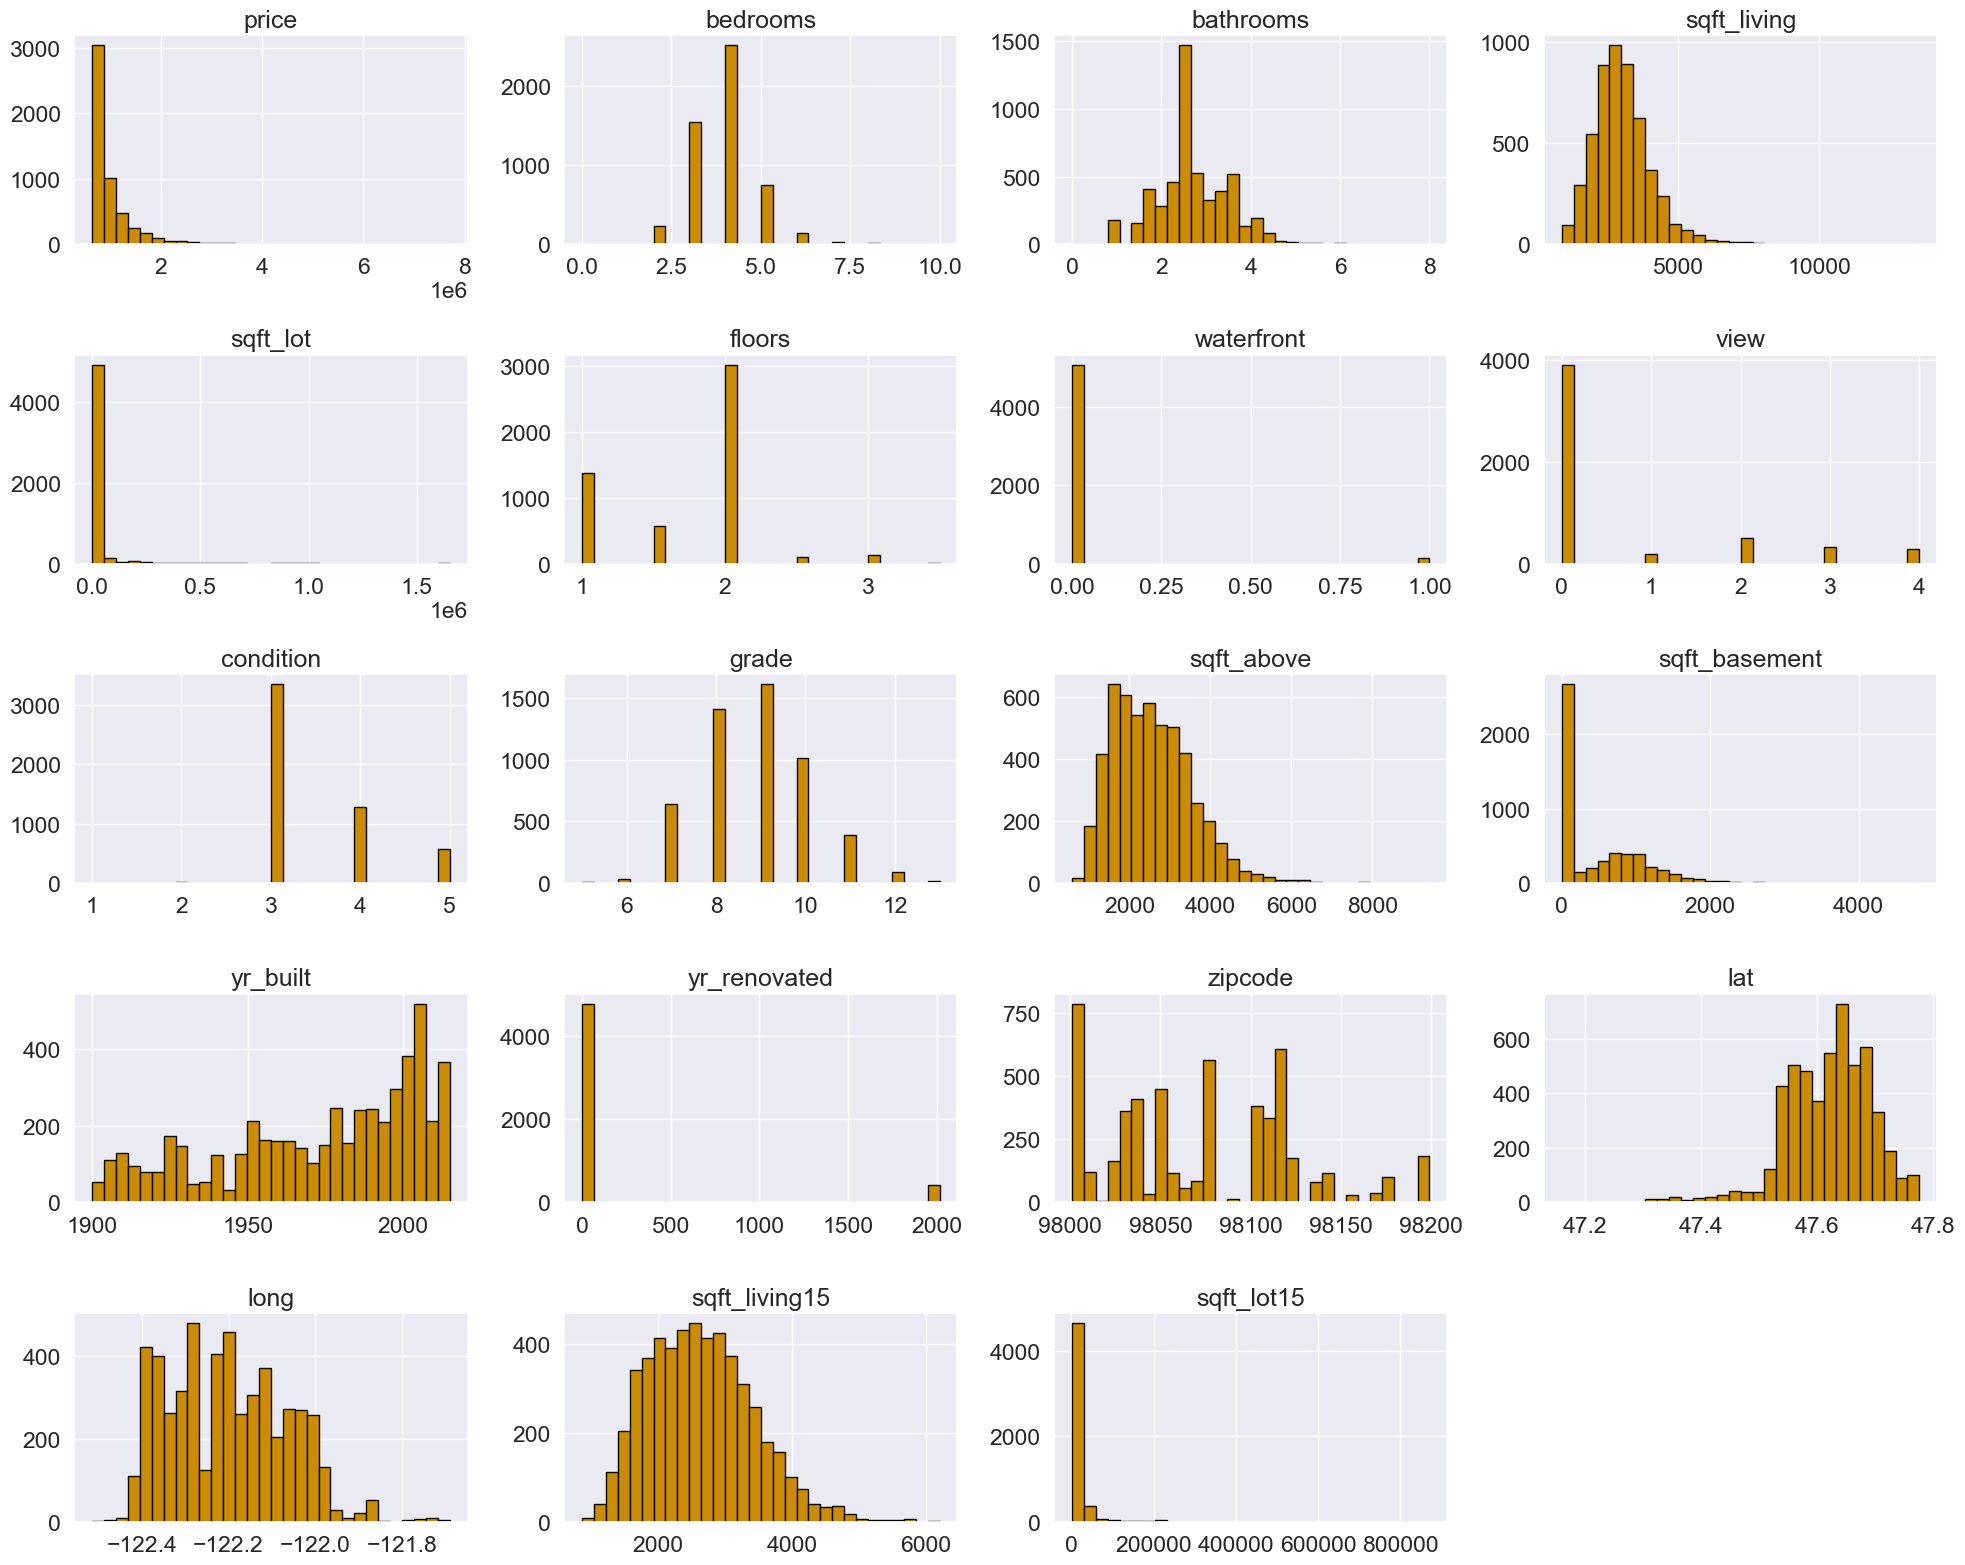

In [360]:
color = '#CC8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df1.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df1.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df1.columns[i])

plt.tight_layout()
plt.show()

In [363]:
# this column is a catagorical data with only two features.
df1.waterfront.value_counts()

waterfront
0    5074
1     133
Name: count, dtype: int64

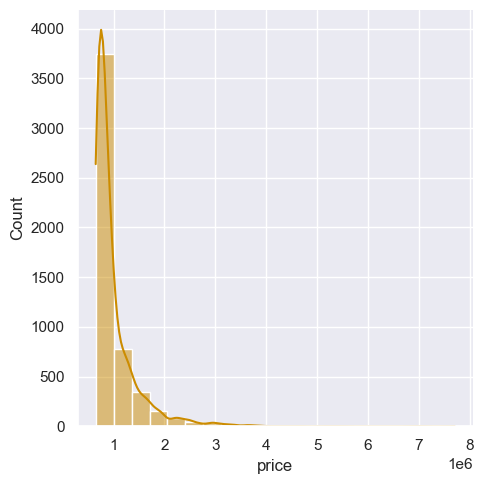

In [365]:
sns.set(rc={'figure.figsize':(12,8)})
sns.displot(df1['price'],bins = 20, color=color, kde=True);

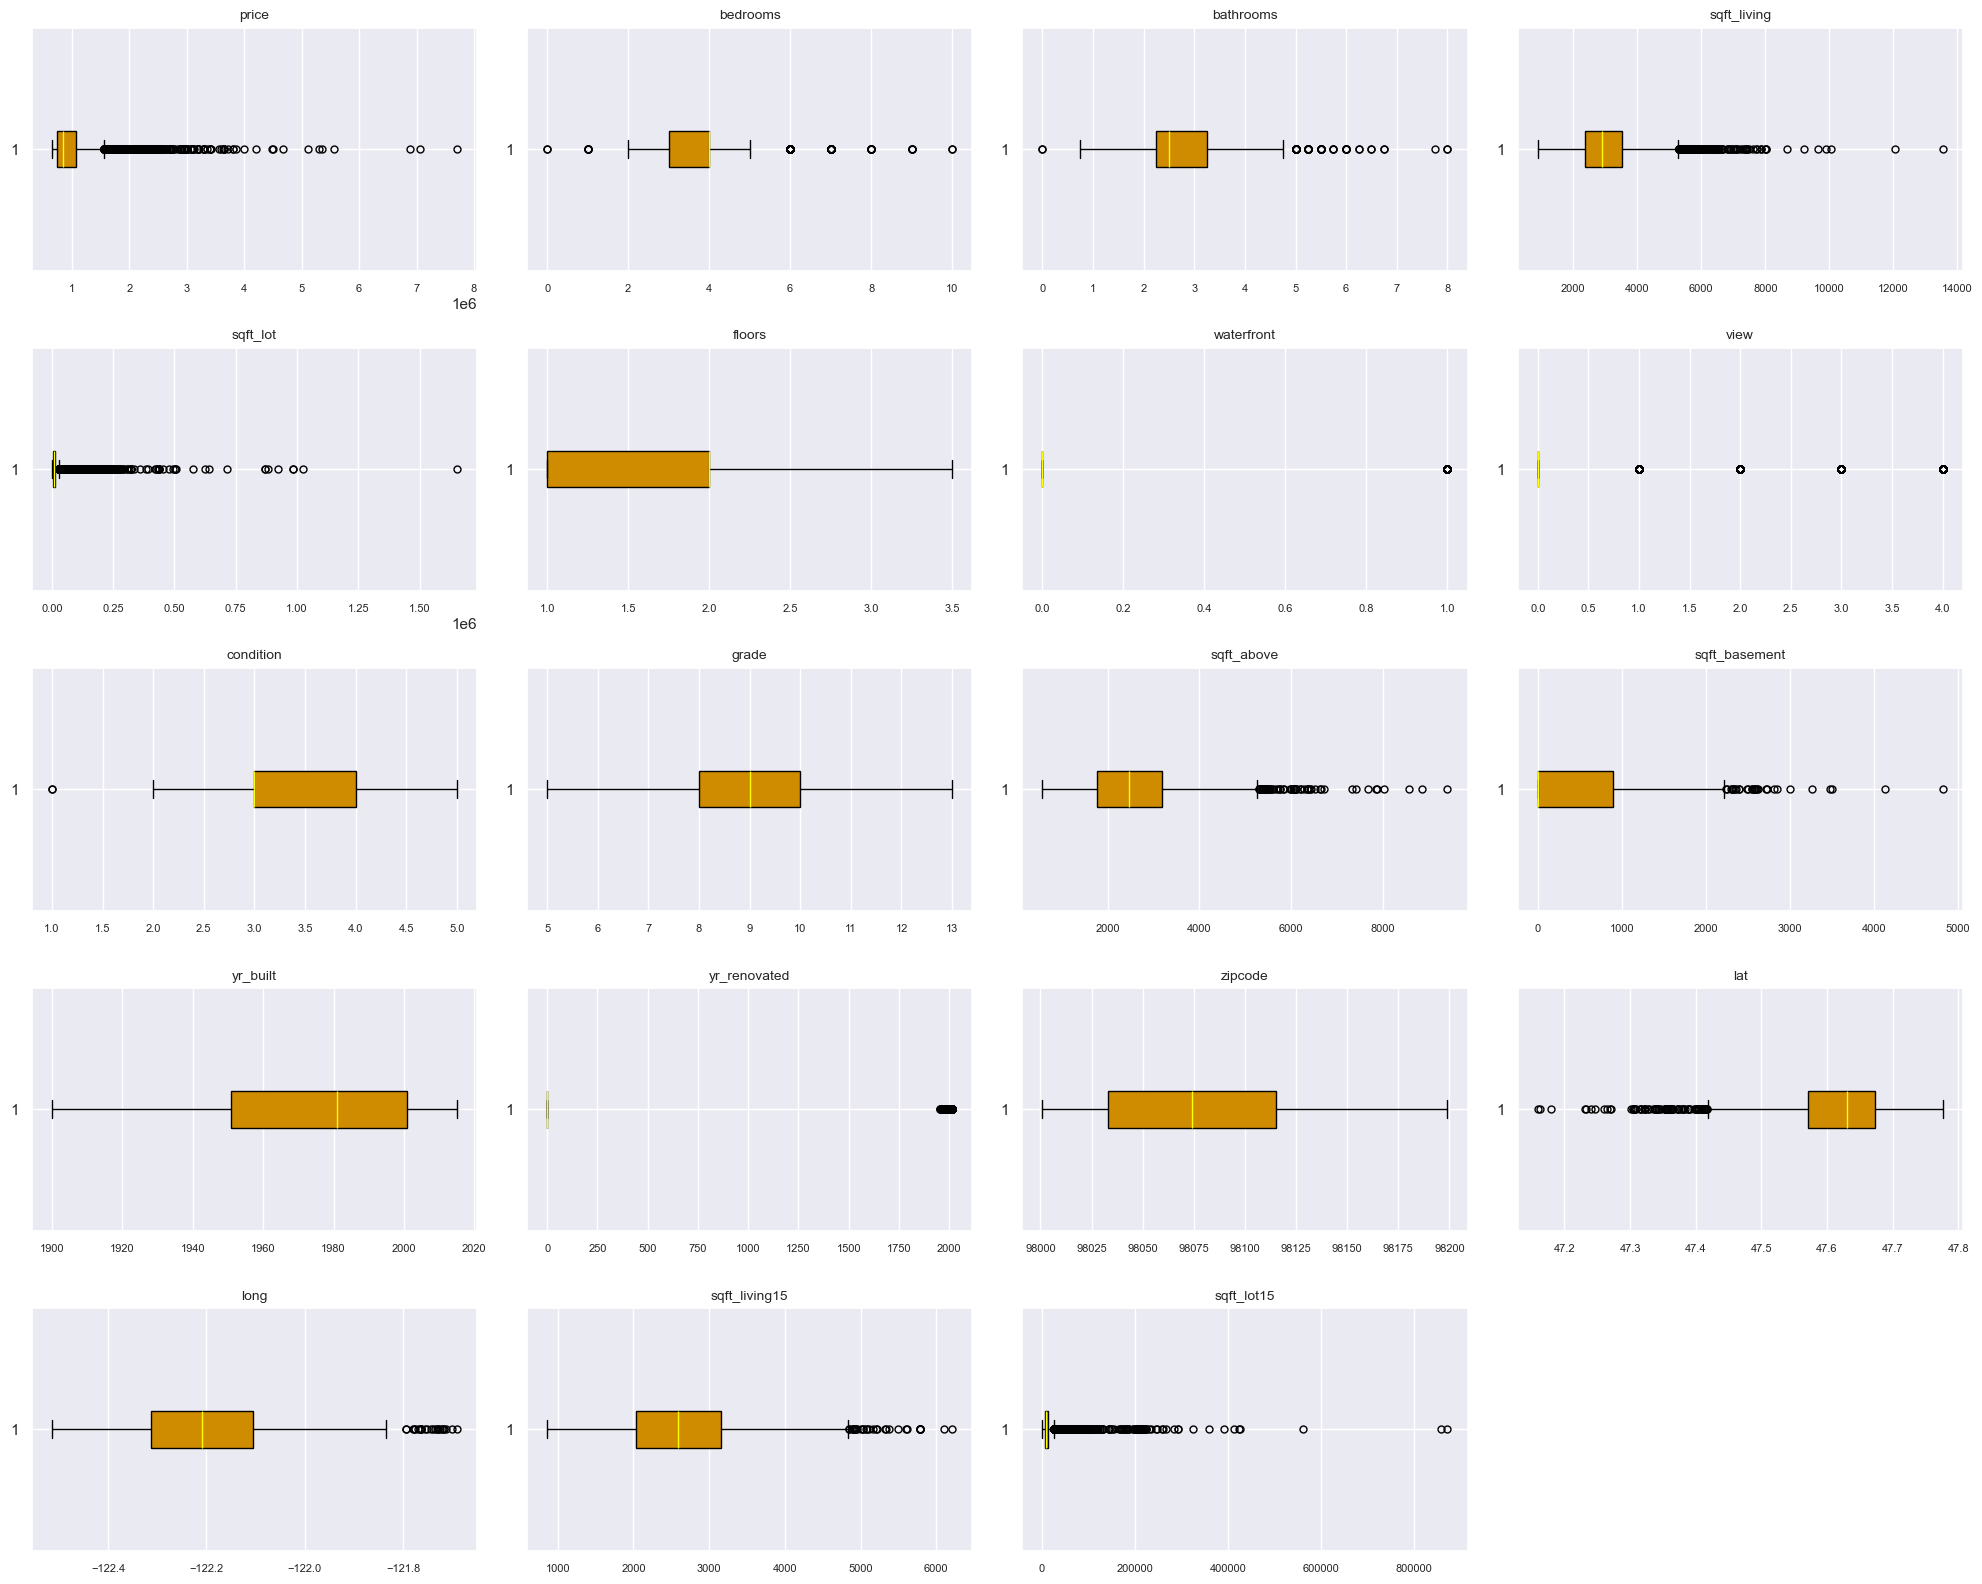

In [367]:
# Checking Outliers
color = '#CF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df1.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df1.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df1.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [368]:
df1.shape

(5207, 19)

In [371]:
# Looking for data's with numeric data type
numeric_data = df1.select_dtypes(include=[np.number])
numeric_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [373]:
df1.corrwith(df1['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.605983
grade            0.504028
sqft_above       0.463309
bathrooms        0.461933
sqft_living15    0.369248
view             0.339016
waterfront       0.312465
sqft_basement    0.290139
bedrooms         0.201238
floors           0.122882
yr_renovated     0.104321
sqft_lot15       0.037177
sqft_lot         0.031000
yr_built         0.028948
condition        0.004160
lat             -0.008221
zipcode         -0.083695
long            -0.085488
dtype: float64

In [375]:
# list columns with poor correlations
poor_corr = ['floors', 'yr_renovated', 'sqft_lot15', 'sqft_lot', 'yr_built', 'condition', 'lat', 'zipcode', 'long']

In [377]:
# Drop columns with poor correlations
df1.drop(poor_corr, axis = 1, inplace=True)

In [379]:
# dealing with Multicollinearity
num_corr = round(df1.corr(), 2)

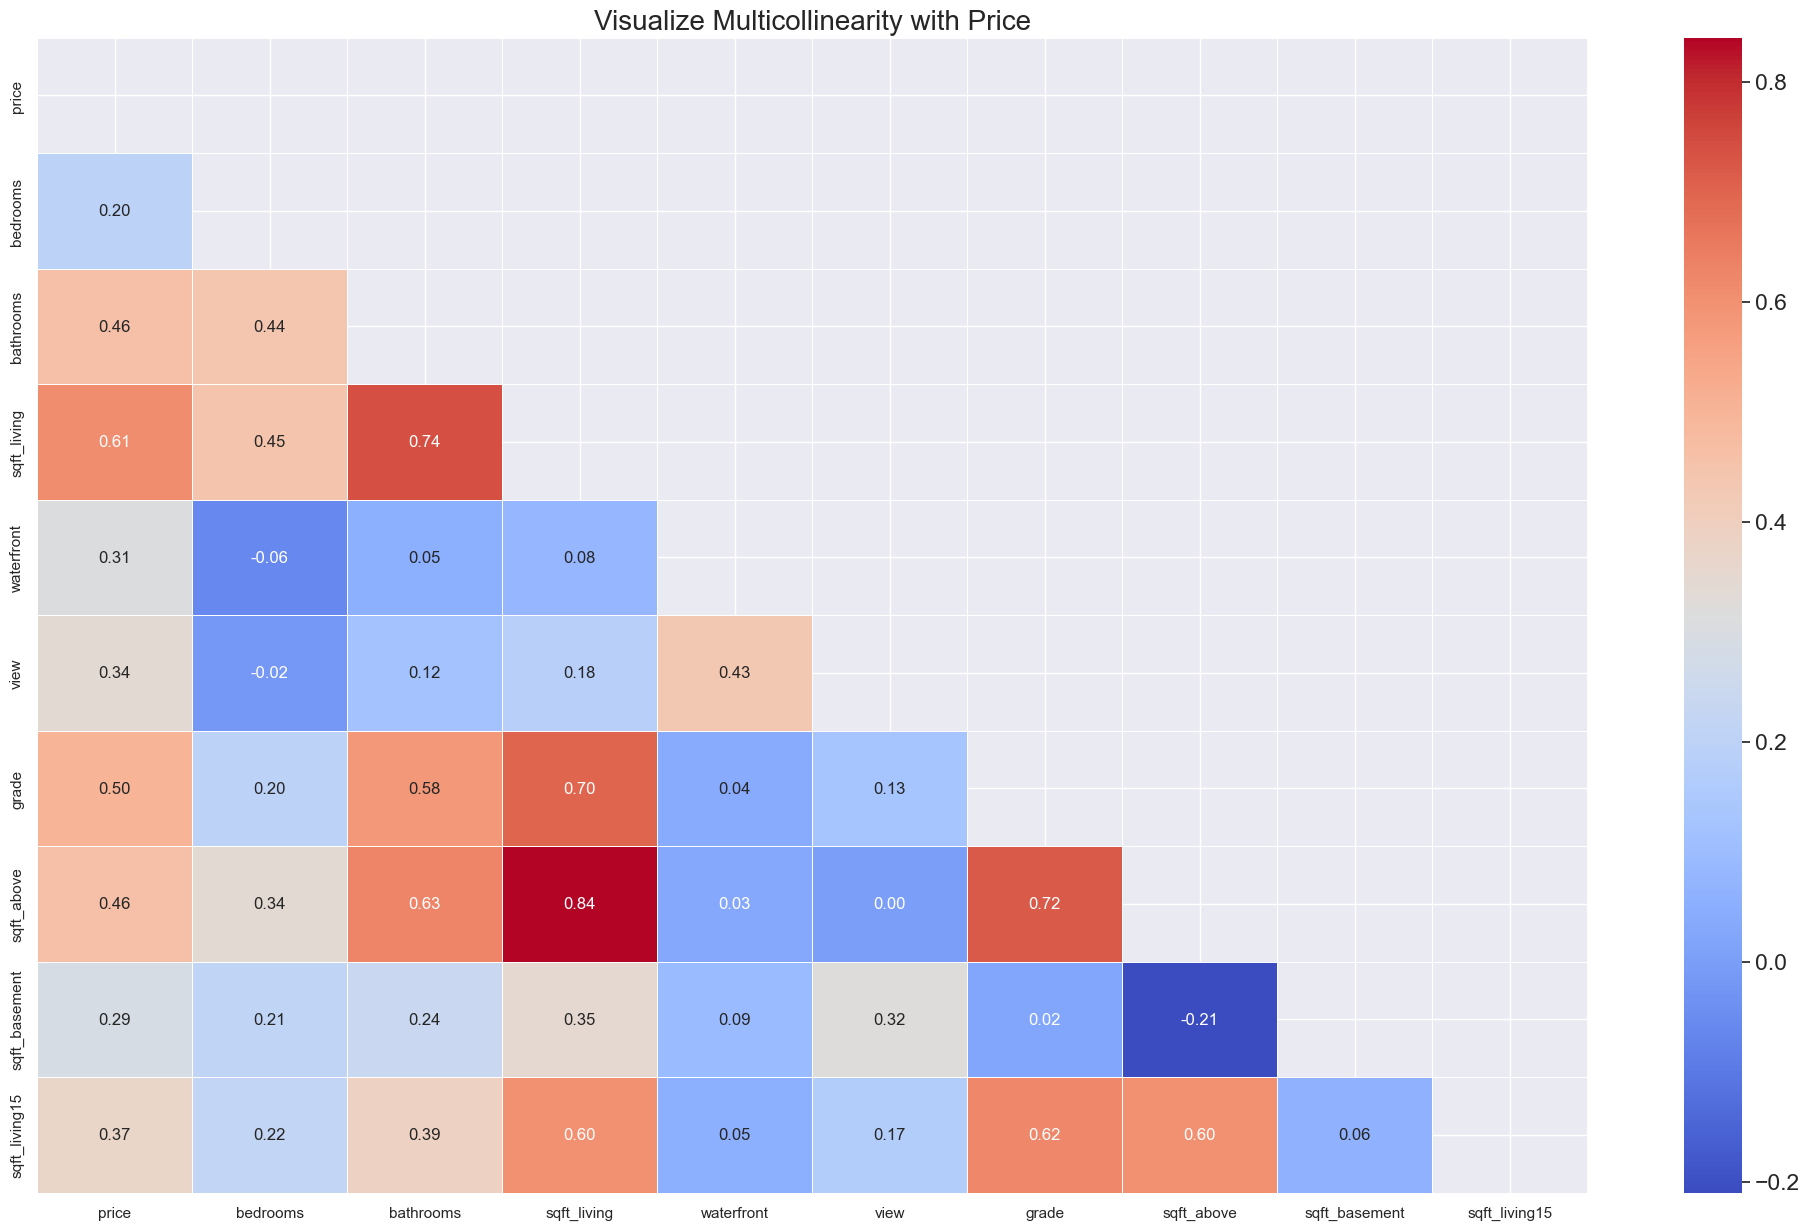

In [381]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Visualize Multicollinearity with Price", fontsize=20) # add title
plt.show()

In [383]:
# list of columns with high correlations
price            1.000000
sqft_living      0.605983
grade            0.504028
sqft_above       0.463309
bathrooms        0.461933
sqft_living15    0.369248
view             0.339016
waterfront       0.312465
sqft_basement    0.290139
bedrooms         0.201238

SyntaxError: invalid syntax (1076693165.py, line 2)

<Axes: xlabel='bedrooms', ylabel='price'>

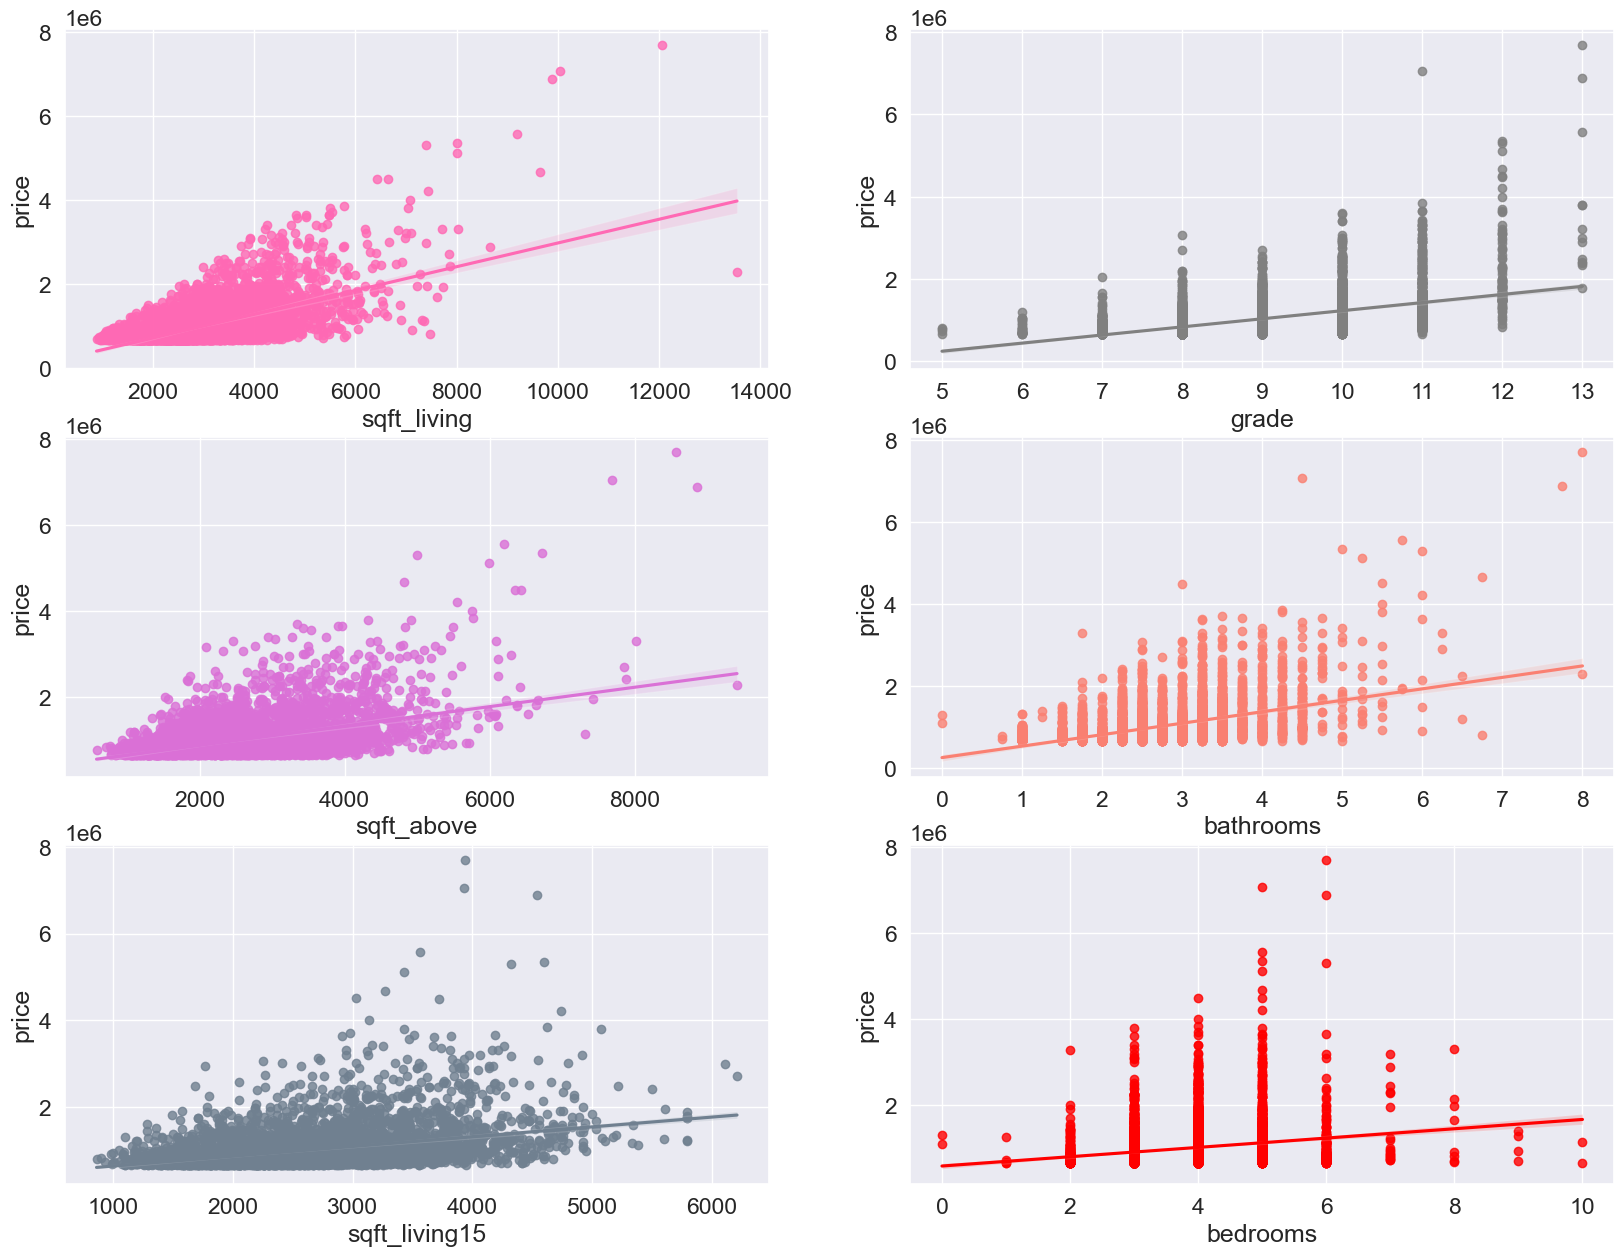

In [385]:
# scater plots among the most correlated variables
fig,((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

sns.regplot(x='sqft_living', y='price', data=df1, color='hotpink', scatter=True,fit_reg=True, ax=ax1)

sns.regplot(x='grade', y='price', data=df1, color='gray', scatter=True,fit_reg=True, ax=ax2)

sns.regplot(x='sqft_above', y='price', data=df1, color='orchid', scatter=True,fit_reg=True, ax=ax3)

sns.regplot(x='bathrooms', y='price', data=df1, color='salmon', scatter=True,fit_reg=True, ax=ax4)

sns.regplot(x='sqft_living15', y='price', data=df1, color='slategray', scatter=True,fit_reg=True, ax=ax5)

sns.regplot(x='bedrooms', y='price', data=df1, color='red', scatter=True,fit_reg=True, ax=ax6)

<Axes: xlabel='bathrooms', ylabel='price'>

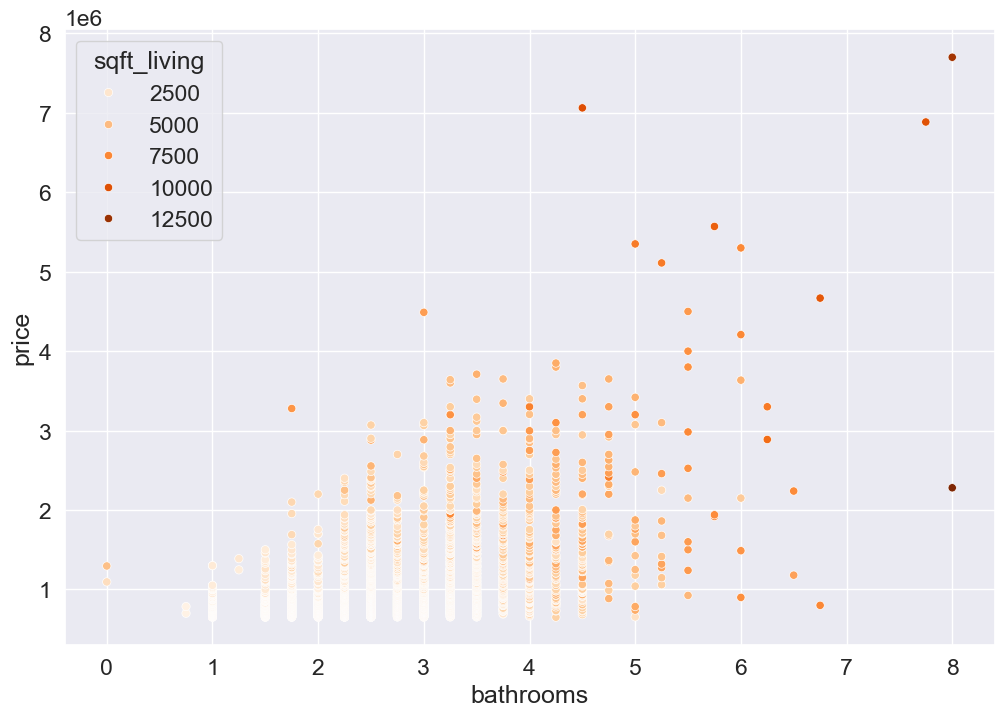

In [485]:
sns.scatterplot(x="bathrooms", y="price", hue="sqft_living", data=df1, palette="Oranges")

# Data Processing
## X-y Split

In [390]:
X = df1.drop("price", axis=1)
y = df1["price"]

# Modeling
## Train-Test Split

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [469]:
# size of our df used in the test and train process.
print(f'100% of our data: {len(df1)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 5207.
80% for training data: 4165.
20% for test data: 1042.


# XGBoost Regression

In [398]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [399]:
import xgboost as xgb

In [402]:
model = xgb.XGBRFRegressor()
model.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [ ]:
# list of columns with high correlations
price            1.000000
sqft_living      0.605983
grade            0.504028
sqft_above       0.463309
bathrooms        0.461933
sqft_living15    0.369248
view             0.339016
waterfront       0.312465
sqft_basement    0.290139
bedrooms         0.201238

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

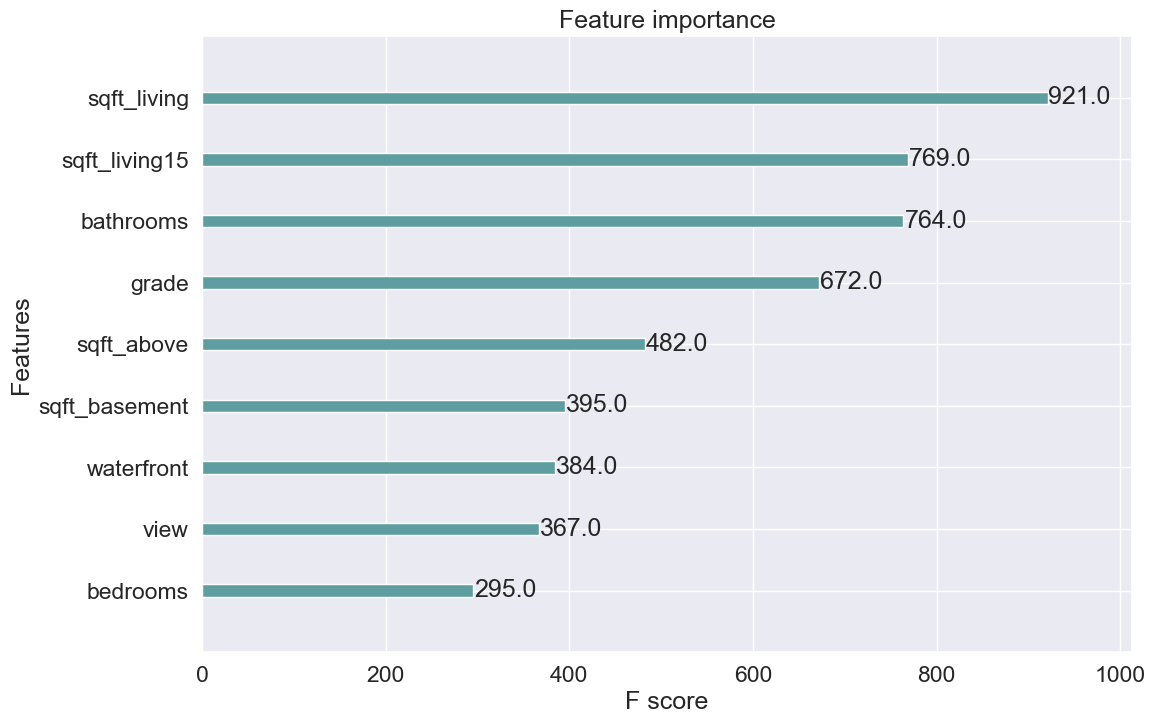

In [548]:
# Features importance that affects the price of the house.
xgb.plot_importance(model,color = 'cadetblue', ax=plt.gca())

In [493]:
# Make predictions on the test dataset
predictions = model.predict(X_test)

In [495]:
predictions[0:10]

array([ 888849.94,  775668.25,  796430.4 ,  990803.44, 1212073.4 ,
        874108.9 ,  832587.  ,  819468.6 ,  756512.4 ,  849165.8 ],
      dtype=float32)

In [497]:
X_test.iloc[0]

bedrooms            4.00
bathrooms           1.75
sqft_living      2260.00
waterfront          0.00
view                0.00
grade               8.00
sqft_above       1690.00
sqft_basement     570.00
sqft_living15    3080.00
Name: 9081, dtype: float64

In [499]:
y_test.iloc[0]

679000.0

In [406]:
# Make a dataframe to compare

eval_df = pd.DataFrame({"actual":y_test,"pred":predictions})
eval_df

,actual,pred
9081,679000.0,8.888499e+05
9832,670000.0,7.756682e+05
3687,1440000.0,7.964304e+05
11574,1750000.0,9.908034e+05
2023,1480000.0,1.212073e+06
...,...,...
17426,775000.0,8.437437e+05
9251,660000.0,7.960117e+05
14979,724950.0,8.667594e+05
457,705000.0,1.070736e+06


In [408]:
eval_df["dif"] = abs(eval_df["actual"]-eval_df["pred"])
eval_df.head()

,actual,pred,dif
9081,679000.0,8.888499e+05,209849.9375
9832,670000.0,7.756682e+05,105668.2500
3687,1440000.0,7.964304e+05,643569.6250
11574,1750000.0,9.908034e+05,759196.5625
2023,1480000.0,1.212073e+06,267926.6250


## Model Validation

In [501]:
predictions_xgb = model.predict(X_test)

## Metrics

In [504]:
r2_3_6 = r2_score(y_test, predictions_xgb)
RMSE_3_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_3_6 = mean_squared_error(y_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

/Applications/anaconda/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [506]:
#Printing the results
print("R2 = ", round(r2_3_6, 4))
print("RMSE = ", round(RMSE_3_6, 4))
print("The value of the metric MSE is ", round(MSE_3_6, 4))
print("MAE = ", round(MAE_3_6, 4))

R2 =  0.4986
RMSE =  348738.696
The value of the metric MSE is  121618678101.5023
MAE =  203175.3324


# Improving the model

## Before Normalization with MinMaxScaler

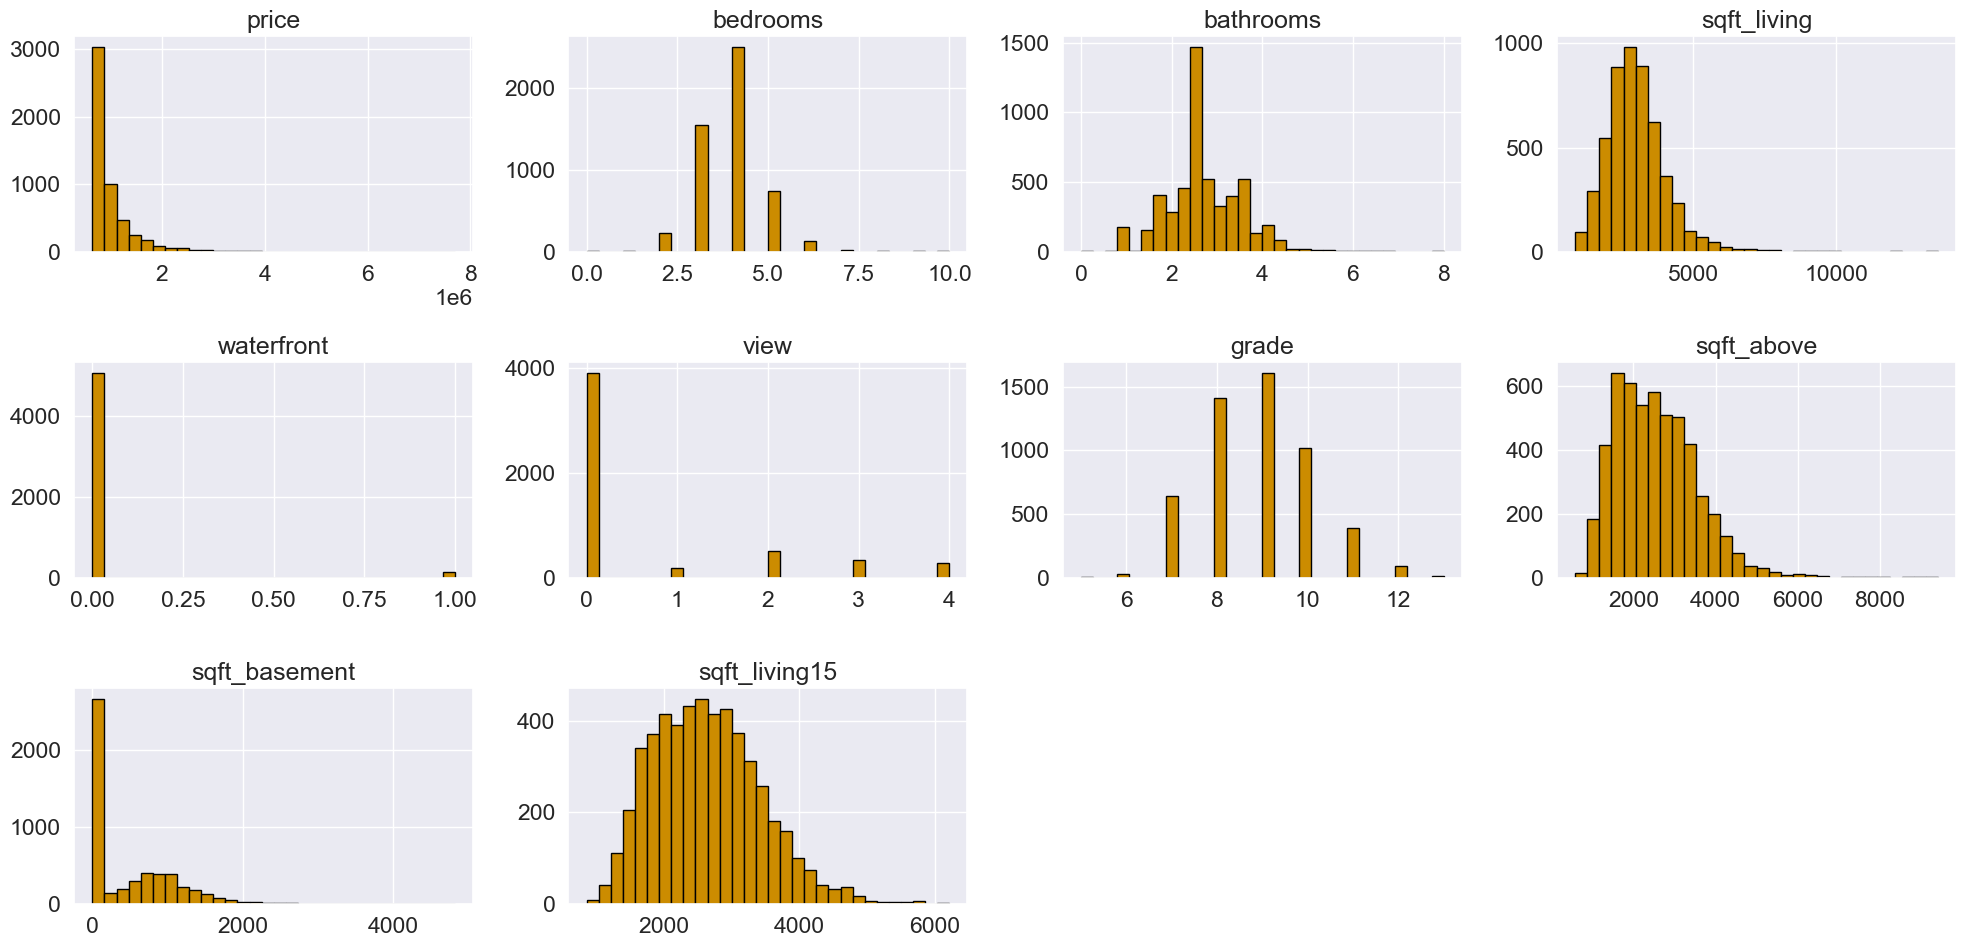

In [420]:
# before Normalization
color = '#CC8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df1.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df1.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df1.columns[i])

plt.tight_layout()
plt.show()

### After Normalization with MinMaxScaler

In [423]:
from sklearn.preprocessing import MinMaxScaler 

In [425]:
scaler = MinMaxScaler()

In [427]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

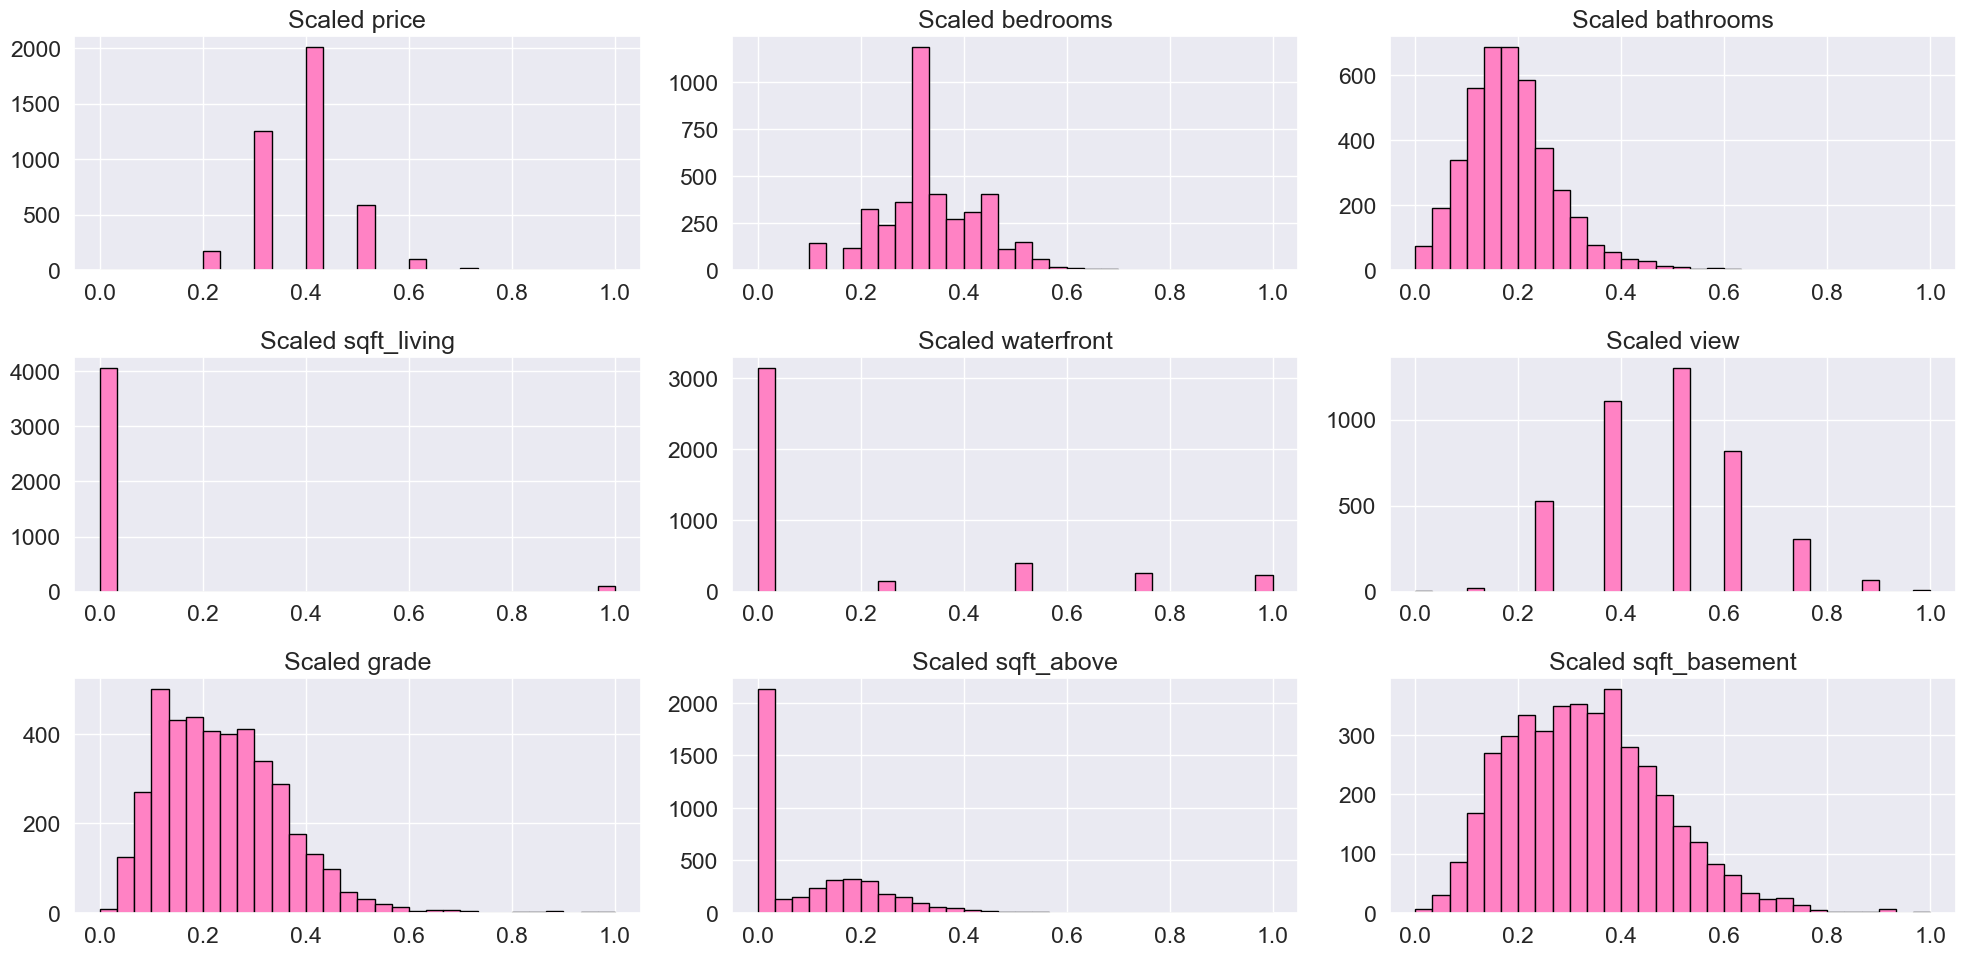

In [508]:
color = '#FF82C4'

nrows, ncols = 5, 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Scaled {df1.columns[i]}')

plt.tight_layout()
plt.show()

In [431]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [433]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.5176
RMSE =  342068.218
The value of the metric MSE is  117010665759.6192
MAE =  206263.8366


/Applications/anaconda/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Removing Outliers

In [436]:
def outlier_slayer(df1): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in df1.select_dtypes(include=[np.number]):
        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]
    return df1

# Reporting

In [439]:
# Actual Vs Predictions
eval_df

,actual,pred,dif
9081,679000.0,8.888499e+05,209849.9375
9832,670000.0,7.756682e+05,105668.2500
3687,1440000.0,7.964304e+05,643569.6250
11574,1750000.0,9.908034e+05,759196.5625
2023,1480000.0,1.212073e+06,267926.6250
...,...,...,...
17426,775000.0,8.437437e+05,68743.6875
9251,660000.0,7.960117e+05,136011.6875
14979,724950.0,8.667594e+05,141809.3750
457,705000.0,1.070736e+06,365735.8750


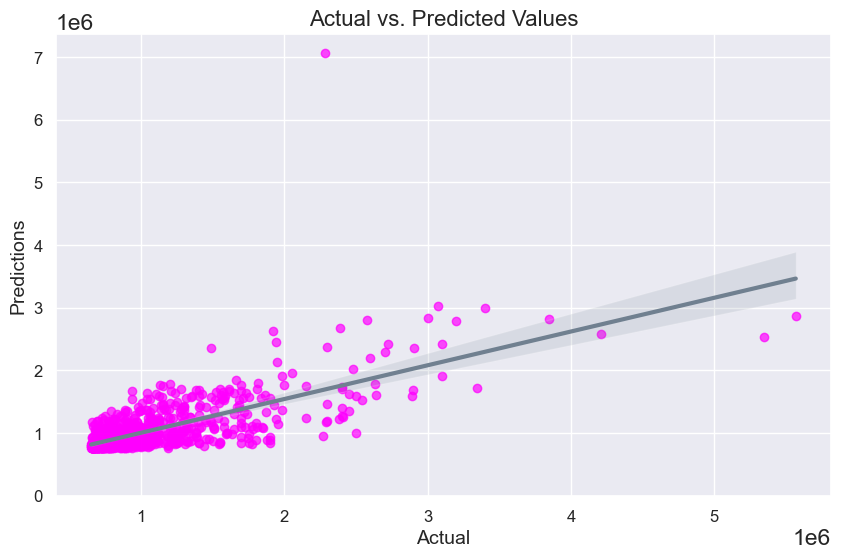

In [441]:
scatter_color = "fuchsia"
line_color = "slategray"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()